In [95]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as patches
from numpy import *

# LiZnSb data

## Calculate eigenvalues and draw scree plots from python

In [62]:
import tensorly as tl
# visulize eigenvalues
raw_data_unfold = np.matrix(tl.unfold(raw_data,2))

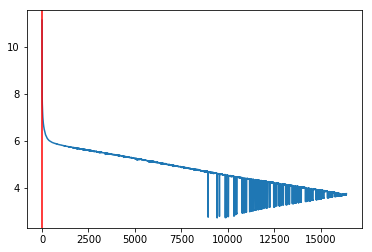

In [63]:
from numpy import linalg as LA
temp = raw_data_unfold * raw_data_unfold.getH() # multiply with its complex conjugate to get a square matrix
e = LA.eigvals(temp)
e = np.sqrt(e)
plt.plot(np.log(e))
plt.axvline(x=9,color='r')

## Load raw data and denoised data

In [98]:
path ='/srv/home/chenyu/TensorDenoise/Experiment/'
raw_data = sio.loadmat(path + 'Experiment_noisy_LiZnSb.mat')
raw_data = raw_data['datacube']

f = h5py.File(path + 'Experiment_tensor_LiZnSb_35-38-180.mat','r')
denoised_data = {}
for k, v in f.items():
    denoised_data[k] = np.array(v)
denoised_data = denoised_data['est_HOOI']

## Check denoised result using ADF image and single CBED

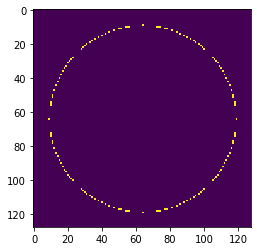

In [4]:
# A circular mask with less points can be generated by using a smaller gap between two radii
circular_mask = create_circular_mask(128, 128, center=(64,64), radius=55) & \
~create_circular_mask(128, 128, center=(64,64), radius=54.5)
plt.imshow(circular_mask)
ADF_noisy = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_denoised = np.zeros((raw_data.shape[0],raw_data.shape[1]))

for i in range(128):
    for j in range(128):
        if circular_mask[i,j] == 1:
            ADF_noisy = ADF_noisy + raw_data[:,:,i*128+j]
            ADF_denoised = ADF_denoised + denoised_data[i*128+j,:,:]

Text(0.5, 1.0, 'Denoised')

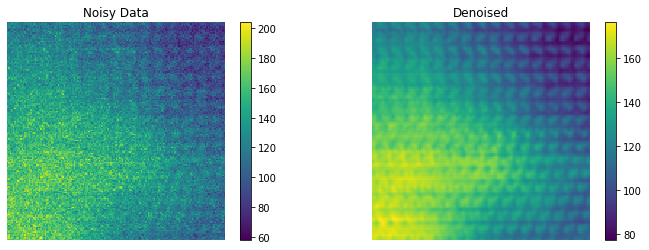

In [5]:
# Compare real space structure from ADF reconstrcutred from a ring with width = 1
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(ADF_noisy)
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.transpose(ADF_denoised))
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

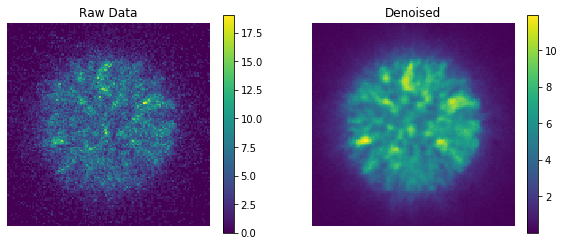

In [54]:
# Compare single CBED
temp = denoised_data[:,2,2]
temp = temp.reshape(128,128)

plt.figure(figsize=(10,4))

plt.subplot(122)
plt.imshow(temp)
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(121)
plt.imshow(raw_data[2,2,:].reshape(128,128))
plt.title('Raw Data')
plt.axis('off')
plt.colorbar()

## Analysis eigenvalues

[0.93539094]


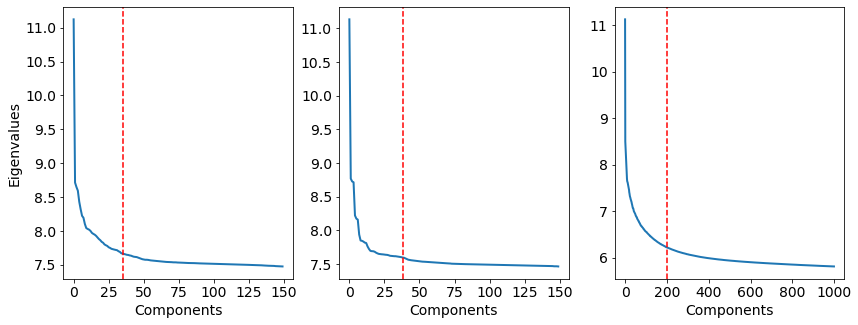

In [53]:
# Analysis eigenvalues
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Experiment_noisy_LiZnSb_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=35,color='r',ls='--')
plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=38,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:1000]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=200,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

scree = temp['scree3']
scree = scree[::-1]
# print(scree[0:100])
print(scree[1300])

Text(0.5, 0, 'Components')

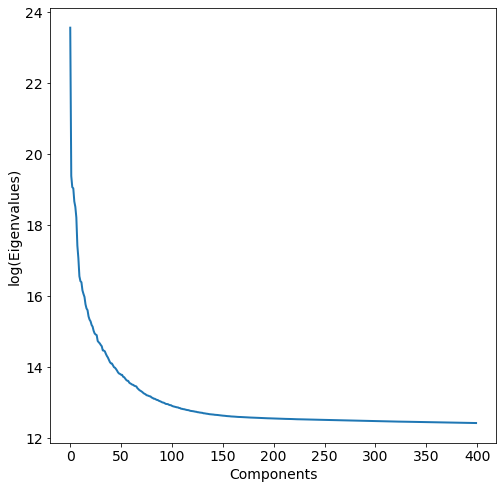

In [40]:
fig = plt.figure(figsize=(8,8))
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=200,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

## Plot the half for LiZnSb data

In [173]:
# for some reason, I cannot find a way to copy a frame from the tensor without using it as a reference
# meaning everytime I calculate square root, the original data in the tensor will be changed at the same time
# for this reason, I am going to first load the data before making plots...
path ='/srv/home/chenyu/TensorDenoise/Experiment/'
raw_data = sio.loadmat(path + 'Experiment_noisy_LiZnSb.mat')
raw_data = raw_data['datacube']

f = h5py.File(path + 'Experiment_tensor_LiZnSb_35-38-180.mat','r')
denoised_data = {}
for k, v in f.items():
    denoised_data[k] = np.array(v)
denoised_data = denoised_data['est_HOOI']

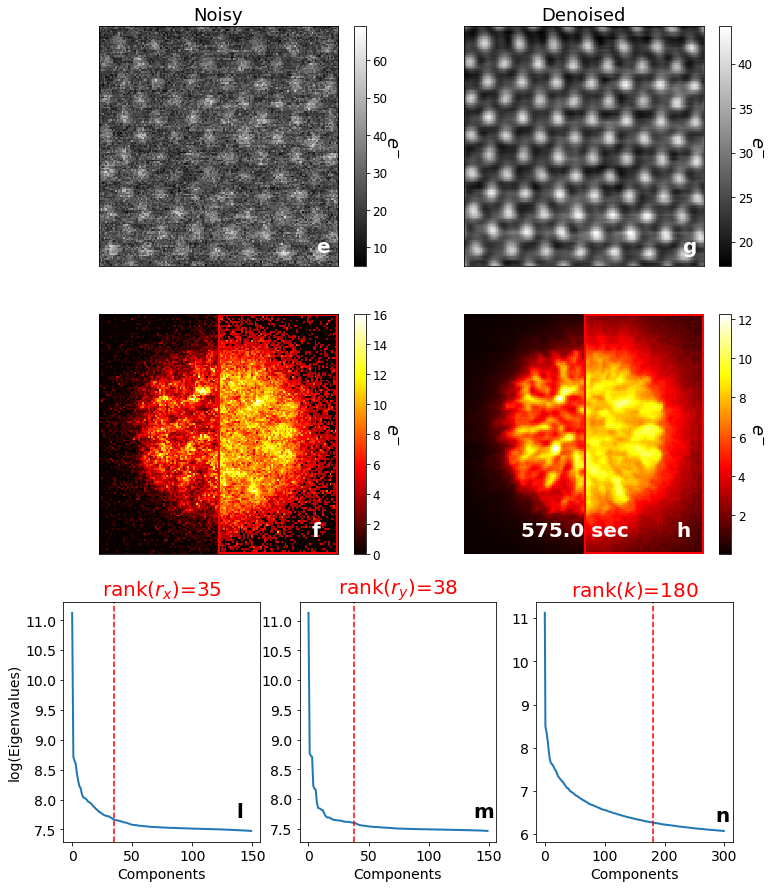

In [174]:
# overall plot
fig = plt.figure(figsize=(12,15))

ax = fig.add_subplot(321)
plt.imshow(ADF_noisy,cmap='gray')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('$e^{-}$',fontsize=18, rotation=270, labelpad=12)
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=18)
ax.text(135,140,'e',fontsize=20,color='white', fontweight='bold')

ax = fig.add_subplot(322)
plt.imshow(np.transpose(ADF_denoised),cmap='gray')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('$e^{-}$',fontsize=18, rotation=270, labelpad=12)
plt.xticks([])
plt.yticks([])
plt.title('Denoised',fontsize=18)
ax.text(135,140,'g',fontsize=20,color='white', fontweight='bold')

# plot CBED patterns
rx = 50
ry = 50

# Noisy CBED
temp = raw_data[:]
temp = temp[rx,ry,:].reshape(128,128)
temp2 = np.sqrt(temp)
temp2 = temp2 / np.amax(temp2) * np.amax(temp)
temp[:,64:-1] = temp2[:,64:-1]

ax = plt.subplot(323)
im = ax.imshow(temp,cmap='hot')
rect = patches.Rectangle((64,0),63,127,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
cbar = plt.colorbar(im, fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('$e^{-}$',fontsize=18, rotation=270, labelpad=12)
ax.text(113,118,'f',fontsize=20,color='white', fontweight='bold')
plt.xticks([])
plt.yticks([])

# Create a image with right half in square root of intensity but normalized to the intensity scale of left side
temp = denoised_data[:]
temp = temp[:,rx,ry].reshape(128,128)
temp2 = np.sqrt(temp)
temp2 = temp2 / np.amax(temp2) * np.amax(temp)
temp[:,64:-1] = temp2[:,64:-1]

ax = plt.subplot(324)
im = ax.imshow(temp,cmap='hot')
rect = patches.Rectangle((64,0),63,127,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
cbar = plt.colorbar(im, fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('$e^{-}$',fontsize=18, rotation=270, labelpad=12)
ax.text(113,118,'h',fontsize=20,color='white', fontweight='bold')
ax.text(30,118,'575.0 sec',fontsize=20,color='white', fontweight='bold')
plt.axis('off')

# load eigenvalues calculated from Matlab
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Experiment_noisy_LiZnSb_eigenvalues.mat')

ax = fig.add_subplot(337)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=35,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)
plt.title('rank($\it{r_x}$)=35',color='red',fontsize=20)
ax.text(137,7.7,'l',fontsize=20,color='black', fontweight='bold')

ax = fig.add_subplot(338)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=38,color='r',ls='--')
plt.xlabel('Components',fontsize=14)
plt.title('rank($\it{r_y}$)=38',color='red',fontsize=20)
ax.text(137,7.7,'m',fontsize=20,color='black', fontweight='bold')

ax = fig.add_subplot(339)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:300]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=180,color='r',ls='--')
plt.xlabel('Components',fontsize=14)
plt.title('rank($\it{k}$)=180',color='red',fontsize=20)
ax.text(285,6.3,'n',fontsize=20,color='black', fontweight='bold')

fig.savefig('/srv/home/chenyu/TensorDenoise/Experiment/LiZnSb_exp_results.tif')

## STO data part
The script here is exactly the same as what I did above on LiZnSb, just using different data

## Load raw and denoised data

In [138]:
path ='/srv/home/chenyu/TensorDenoise/Experiment/'
raw_data = sio.loadmat(path + 'Experiment_noisy_STO_010619_S3.mat')
raw_data = raw_data['datacube']

f = h5py.File(path + 'Experiment_tensor_STO_010619_S3_30-32-70.mat','r')
denoised_data = {}
for k, v in f.items():
    denoised_data[k] = np.array(v)
denoised_data = denoised_data['est_HOOI']

## Check denoise result using ADF and single CBED

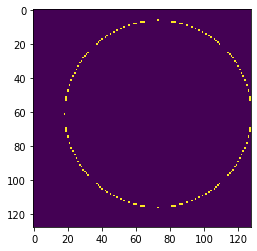

In [139]:
# A circular mask with less points can be generated by using a smaller gap between two radii
# Zero disk radius = 42
circular_mask = create_circular_mask(128, 128, center=(73,61), radius=55) & \
~create_circular_mask(128, 128, center=(73,61), radius=54.5)
plt.imshow(circular_mask)
ADF_noisy = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_denoised = np.zeros((raw_data.shape[0],raw_data.shape[1]))

for i in range(128):
    for j in range(128):
        if circular_mask[i,j] == 1:
            ADF_noisy = ADF_noisy + raw_data[:,:,i*128+j]
            ADF_denoised = ADF_denoised + denoised_data[i*128+j,:,:]

Text(0.5, 1.0, 'Denoised')

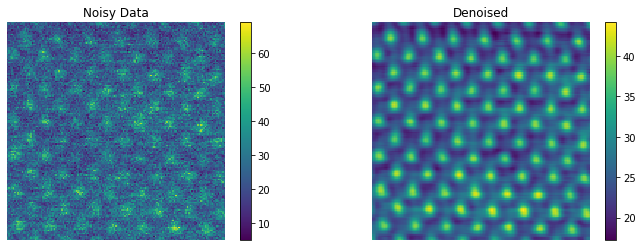

In [140]:
# Compare real space structure from ADF reconstrcutred from a ring with width = 1
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(ADF_noisy)
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.transpose(ADF_denoised))
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

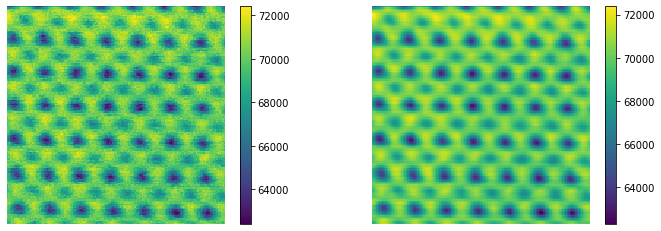

In [141]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(np.sum(raw_data,axis=2))
plt.axis('off')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.transpose(np.sum(denoised_data,axis=0)))
plt.axis('off')
plt.colorbar()

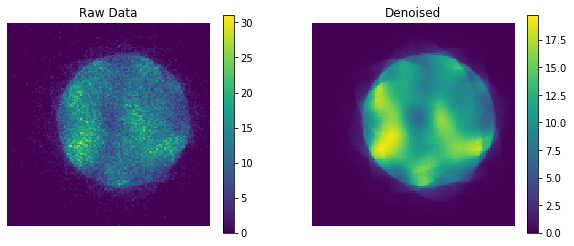

In [142]:
# Compare single CBED
temp = denoised_data[:,2,2]
temp = temp.reshape(128,128)

plt.figure(figsize=(10,4))

plt.subplot(122)
plt.imshow(temp)
# plt.scatter(64,68)
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(121)
plt.imshow(raw_data[2,2,:].reshape(128,128))
# plt.scatter(74,60)
plt.title('Raw Data')
plt.axis('off')
plt.colorbar()

## Analyze eigenvalues

Text(0.5, 0, 'Components')

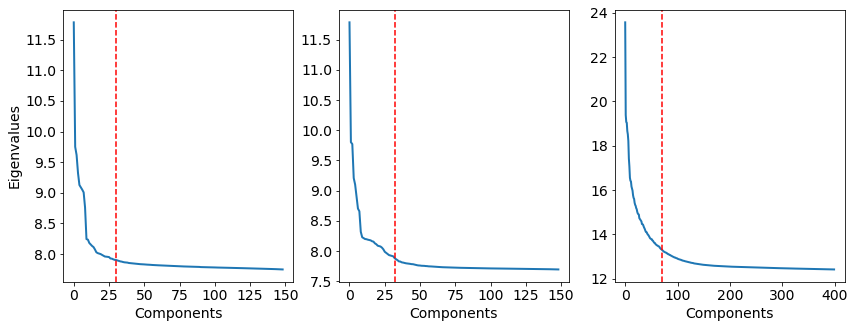

In [34]:
# Analysis eigenvalues
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Experiment_noisy_STO_010619_S3_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=30,color='r',ls='--')
plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=32,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:400]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=70,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)



Text(0.5, 0, 'Components')

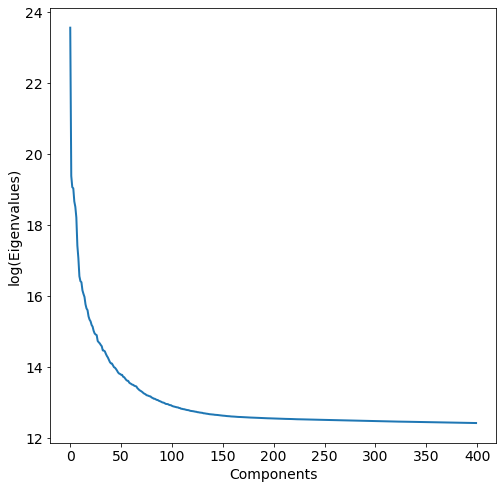

In [38]:
fig = plt.figure(figsize=(8,8))
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=70,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

## Make final plot for STO half

In [175]:
path ='/srv/home/chenyu/TensorDenoise/Experiment/'
raw_data = sio.loadmat(path + 'Experiment_noisy_STO_010619_S3.mat')
raw_data = raw_data['datacube']

f = h5py.File(path + 'Experiment_tensor_STO_010619_S3_30-32-70.mat','r')
denoised_data = {}
for k, v in f.items():
    denoised_data[k] = np.array(v)
denoised_data = denoised_data['est_HOOI']

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sqrt


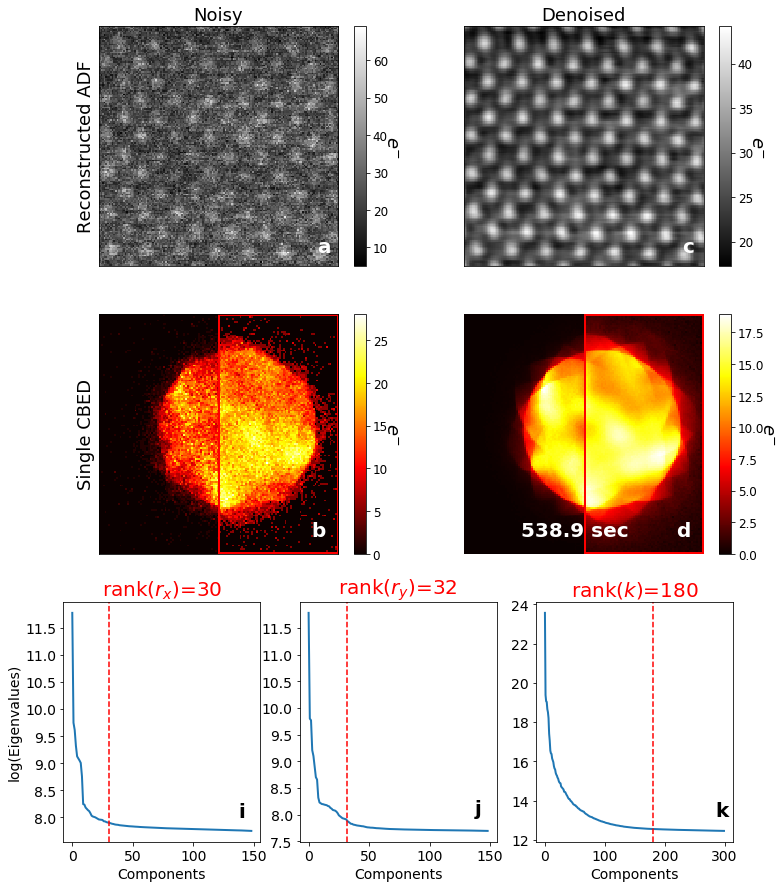

In [176]:
# overall plot
fig = plt.figure(figsize=(12,15))

ax = fig.add_subplot(321)
plt.imshow(ADF_noisy,cmap='gray')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('$e^{-}$',fontsize=18, rotation=270, labelpad=12)
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=18)
plt.ylabel('Reconstructed ADF', fontsize=18)
ax.text(135,140,'a',fontsize=20,color='white', fontweight='bold')

ax = fig.add_subplot(322)
plt.imshow(np.transpose(ADF_denoised),cmap='gray')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('$e^{-}$',fontsize=18, rotation=270, labelpad=12)
plt.xticks([])
plt.yticks([])
plt.title('Denoised',fontsize=18)
ax.text(135,140,'c',fontsize=20,color='white', fontweight='bold')

# plot CBED patterns
rx = 50
ry = 50

# Noisy CBED
temp = raw_data[:]
temp = temp[rx,ry,:].reshape(128,128)
temp2 = np.sqrt(temp)
index = isnan(temp2)
temp2[index] = 0
temp2 = temp2 / np.amax(temp2) * np.amax(temp)
temp[:,64:-1] = temp2[:,64:-1]

ax = plt.subplot(323)
im = ax.imshow(temp,cmap='hot')
rect = patches.Rectangle((64,0),63,127,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
cbar = plt.colorbar(im, fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('$e^{-}$',fontsize=18, rotation=270, labelpad=12)
ax.text(113,118,'b',fontsize=20,color='white', fontweight='bold')
plt.ylabel('Single CBED', fontsize=18)
plt.xticks([])
plt.yticks([])

# Create a image with right half in square root of intensity but normalized to the intensity scale of left side
temp = denoised_data[:]
temp = temp[:,rx,ry].reshape(128,128)
temp2 = np.sqrt(temp)
# if there is nan in the array,amax will return nan as result and the normalized image will be all of zeros 
index = isnan(temp2)
temp2[index] = 0
temp2 = temp2 / np.amax(temp2) * np.amax(temp)
temp[:,64:-1] = temp2[:,64:-1]

ax = plt.subplot(324)
im = ax.imshow(temp,cmap='hot')
rect = patches.Rectangle((64,0),63,127,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
cbar = plt.colorbar(im, fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('$e^{-}$',fontsize=18, rotation=270, labelpad=12)
ax.text(113,118,'d',fontsize=20,color='white', fontweight='bold')
ax.text(30,118,'538.9 sec',fontsize=20,color='white', fontweight='bold')
plt.axis('off')

# load eigenvalues calculated from Matlab
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Experiment_noisy_STO_010619_S3_eigenvalues.mat')

ax = fig.add_subplot(337)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=30,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)
plt.title('rank($\it{r_x}$)=30',color='red',fontsize=20)
ax.text(137,8,'i',fontsize=20,color='black', fontweight='bold')

ax = fig.add_subplot(338)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=32,color='r',ls='--')
plt.xlabel('Components',fontsize=14)
plt.title('rank($\it{r_y}$)=32',color='red',fontsize=20)
ax.text(137,8,'j',fontsize=20,color='black', fontweight='bold')

ax = fig.add_subplot(339)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:300]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=180,color='r',ls='--')
plt.xlabel('Components',fontsize=14)
plt.title('rank($\it{k}$)=180',color='red',fontsize=20)
ax.text(285,13.2,'k',fontsize=20,color='black', fontweight='bold')

fig.savefig('/srv/home/chenyu/TensorDenoise/Experiment/STO_exp_results.tif')

## Function that will be called

In [3]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask